In [1]:
%cd D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading
%load_ext autoreload
%autoreload 2
from shading_model import *
from data_utils import *
from torch.autograd import Variable

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

device = torch.device("cuda")

D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading


In [2]:
trainset = AODataset("\\Dropbox (GaTech)\\CS7643 Deep Learning\\Deep-Shading\\example_data\\AO\\", split="test")
dataloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=0)


D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_position.txt
D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_normal.txt
D:\Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\
Successfully loaded 8 images from \Dropbox (GaTech)\CS7643 Deep Learning\Deep-Shading\example_data\AO\test_groundtruth.txt


In [18]:
model = ShadingModel().to(device)
optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0)
model.train()
loss_func = nn.MSELoss()

for epoch in range(20):
    for i, data in enumerate(dataloader, 0):
        pos, normal, gt = data
        pos, normal, gt = Variable(pos).to(device), Variable(normal).to(device), Variable(gt).to(device)
        pos = pos.permute(0, 3, 1, 2)
        normal = normal.permute(0, 3, 1, 2)
        gt = gt.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(normal, pos)
        #loss = model.loss(outputs, gt)
        loss = loss_func(outputs, gt)
        loss.backward()
        optimizer.step()
    print(epoch, loss.item())

0 0.6325859427452087
1 0.512406051158905
2 0.4135764241218567
3 0.3311920464038849
4 0.261688232421875
5 0.20351940393447876
6 0.15566936135292053
7 0.11728048324584961
8 0.08743146806955338
9 0.06505489349365234
10 0.04895458370447159
11 0.03788340091705322
12 0.030652906745672226
13 0.026139194145798683
14 0.023454351350665092
15 0.021932635456323624
16 0.021107755601406097
17 0.02067730575799942
18 0.020458849146962166
19 0.02034926414489746


In [19]:
#optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
model.train()
for epoch in range(20):
    for i, data in enumerate(dataloader, 0):
        pos, normal, gt = data
        pos, normal, gt = Variable(pos).to(device), Variable(normal).to(device), Variable(gt).to(device)
        pos = pos.permute(0, 3, 1, 2)
        normal = normal.permute(0, 3, 1, 2)
        gt = gt.unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(normal, pos)
        #loss = model.loss(outputs, gt)
        loss = loss_func(outputs, gt)
        loss.backward()
        optimizer.step()
    print(epoch, loss.item())

0 0.02029339224100113
1 0.020263129845261574
2 0.020244674757122993
3 0.02023148536682129
4 0.020220531150698662
5 0.02021045610308647
6 0.020200660452246666
7 0.020190874114632607
8 0.02018097974359989
9 0.020170921459794044
10 0.020160671323537827
11 0.02015020325779915
12 0.020139506086707115
13 0.020128555595874786
14 0.020117346197366714
15 0.020105861127376556
16 0.02009408362209797
17 0.020081989467144012
18 0.02006956748664379
19 0.020056800916790962


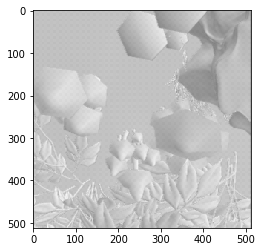

In [20]:
i = model(normal, pos)
pic = i.squeeze(1).cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

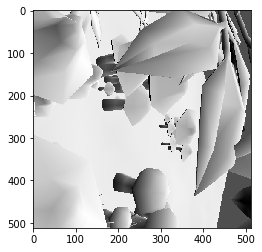

In [17]:
pic = normal[:,0,:,:].cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

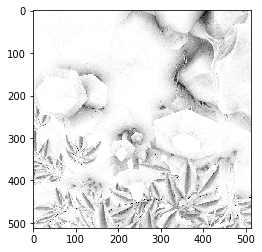

In [21]:
pic = gt.squeeze(1).cpu().data[0].numpy()
plt.imshow(pic, cmap='gray')

In [18]:
pic = exr_loader("./Position/000000000..exr", ndim=3)

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


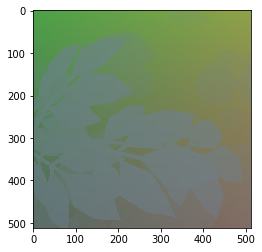

In [19]:
plt.imshow(pic)

In [24]:
# task = "AO", "GI",...
# buffers = a list of "position", "normal", "groundtruth",...
def load_train(task, buffers=None):
    result = {}
    if task == "AO":
        if buffers is None:
            buffers = ["position", "normal", "groundtruth"]
        for buffer_type in buffers:
            result[buffer_type] = load_one_file("./dataset/training_" + buffer_type + ".txt")
    return result

In [28]:
def load_one_file(filename):
    with open(filename) as f:
        images = []
        for line in f.readlines():
            path = line.split()[0]
            images.append(exr_loader(path, ndim=3)) # really 3 ??
    return np.array(images)

In [31]:
data = load_train("AO", ["groundtruth"])

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [46]:
%cd D:\Dropbox (GaTech)\CS7643 Deep Learning\DL4CG

D:\Dropbox (GaTech)\CS7643 Deep Learning\DL4CG


In [62]:
import OpenEXR
import Imath

# read image and its dataWindow to obtain its size
pic = OpenEXR.InputFile("./GI/Conference/Normals/000000000..exr")
pic.header()

{'channels': {'A': HALF (1, 1),
  'B': HALF (1, 1),
  'G': HALF (1, 1),
  'R': HALF (1, 1)},
 'compression': NO_COMPRESSION,
 'dataWindow': (0, 0) - (255, 255),
 'displayWindow': (0, 0) - (255, 255),
 'lineOrder': INCREASING_Y,
 'pixelAspectRatio': 1.0,
 'screenWindowCenter': (0.0, 0.0),
 'screenWindowWidth': 1.0}

In [67]:
# read image and its dataWindow to obtain its size
pic = OpenEXR.InputFile("./IBL/Conference/Specular/000000000..exr")
print(pic.header())

pt = Imath.PixelType(Imath.PixelType.FLOAT)
dw = pic.header()['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

pt = Imath.PixelType(Imath.PixelType.FLOAT)

channel = np.fromstring(pic.channel('B', pt), dtype=np.float32)
channel.shape = (size[1], size[0])  # Numpy arrays are (row, col)
np.array(channel)

{'channels': {'A': HALF (1, 1), 'B': HALF (1, 1), 'G': HALF (1, 1), 'R': HALF (1, 1)}, 'compression': NO_COMPRESSION, 'dataWindow': (0, 0) - (255, 255), 'displayWindow': (0, 0) - (255, 255), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0}


D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


array([[0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       [0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       [0.3046875 , 0.3046875 , 0.3046875 , ..., 0.3046875 , 0.3046875 ,
        0.3046875 ],
       ...,
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ],
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ],
       [0.11938477, 0.11938477, 0.11938477, ..., 0.5444336 , 0.5444336 ,
        0.5444336 ]], dtype=float32)

D:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


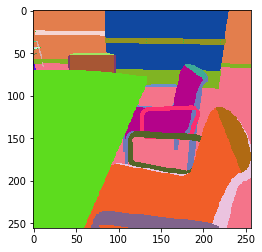

In [70]:
pic = exr_loader("./IBL/Conference/Specular/000000000..exr", ndim=3)
plt.imshow(pic)